# Musica e serie di Fourier

Vogliamo sintetizzare strumenti musicali "combinando" le funzioni $\sin(kt)$ e $\cos(kt)$, per $k = 1, 2, 3, \ldots $. Per lavorarci al computer, useremo le valutazioni della funzione 

$$
  s(t) = a_1 \sin(t) + b_1 \cos(t) + a_2 \sin(2t) + b_2 \cos(2t) + \ldots
$$

su un numero finito di punti, costruendo il vettore 

$$
  \mathbf s := [ s(t_1), s(t_2), \ldots, s(t_N) ], \qquad 
  t_j := \frac{j-1}{44100}, \qquad 
  j = 1, \ldots, N.
$$

Il numero $44100$ è la nostra **frequenza di campionamento**. 



In [ ]:
# Importiamo tutte le funzioni che sono state già preparate per il laboratorio, per risparmiare tempo.
from settimanamatematica import *



Vediamo come **realizzare grafici**, e mostriamo la corrispondenza fra la funzione $s(t) = \sin(t) + 3 \cos(7t)$ e il suo campionamento su $[0, 1]$ usando come frequenza di campionamento $f = 10$, invece che il solito $44100$.

In [ ]:
# Costruiamo il vettore con i valori su cui valutare la funzione. Per fare questo, 
# usiamo la funzione np.linspace, che suddivide un intervallo in N punti.

t = np.linspace(0, 1, 50) # Ci servono 11 punti perchè siano distanziati di 1/10
#print("Campionamento:", t)

# Ora valutiamo le funzioni elementari, assegnadogli un nome, e poi sommandole.
# Osserviamo che questi sono vettori, che contengono 11 valori! Potete provare a
# stamparli, se volete.
y1 = np.sin(t)
y2 = 3 * np.cos(7*t)
y = y1 + y2

# Mostriamo le funzioni ed il loro campionamento
plt.plot(t, y, "b-");

Il codice che abbiamo eseguito (**settimanamatematica.py**) prima ci mette a disposizione alcune funzioni per manipolare ulteriormente i vettori, precisamente:


*   ```unisci(v1, v2, ...)``` permette di concatenare un numero arbitrario di vettori. 
*   ```sound(v)``` permette di ascoltare il suono di quel vettore tramite le cuffie (o le casse) del vostro PC.
*   ```registra()``` permette di registrare audio, da salvare poi con il comando ```salva_registrazione()``` in un file dal nome ```file.wav```.



## **Esercizio:** Suonare Fra Martino con un diapason
Cominciamo con un esempio semplice: il suono del diapason è descritto molto bene dalla funzione 
$$
  s(t) = \sin(2\pi f t), 
$$
dove $f$ è uguale a $440$Hz, ovvero la frequenza del La. 

Per ricreare il suono per un tempo $T$ possiamo scrivere una breve funzione ```crea_suono``` che suddivida l'intervallo $[0, T]$ in punti distanti circa $1/44100$ secondi. A quel punto, costruiamo la valutazione in quei punti come:
$$
  y_j = \sin(2 \pi f t_j), \qquad 
  t_j := \frac{j-1}{44100}, \qquad 
  j = 1, \ldots, \lceil 44100 T \rceil
$$

La funzione ```nota2freq```, già definita, vi permette di convertire una nota in una frequenza. Ad esempio:


In [ ]:
print(nota2freq("La4"))

La seguente funzione implementa l'idea descritta sopra. Come abbiamo visto, la maggior parte delle funzioni matematiche si può applicare sui vettori usando ```np.xxx``` dove ```xxx``` è il nome della funzione desiderata. Qui lo facciamo con la funzione seno. 

In [ ]:
def crea_suono(nota, durata):
  # Scegliamo una frequenza di sampling, ovvero il numero di punti 
  # al secondo da calcolare. Come abbiamo visto, 44100 è un numero 
  # che garantisce buoni risultati per l'orecchio umano. 
  fs = 44100

  # Calcoliamo un numero di punti sufficienti per suddividere l'intervallo.
  # La funzione np.linspace(a,b,N) divide [a, b] usando N punti.
  t = np.linspace(0, durata, round(durata * fs) + 1)

  # Determiniamo la frequenza della nota specificata; questa funzione è scritta 
  # nel blocco di codice nascosto, e trasforma un testo come "La4" in un numero 
  # come 440.  
  f = nota2freq(nota)

  # Calcoliamo l'onda sinusoidale con la giusta frequenza
  y = np.sin(2 * np.pi * f * t)

  # Step opzionale: smorziamo il suono all'inizio e alla fine per renderlo 
  # più realistico, moltiplicando la funzione sinusodidale per la funzione
  # min(30t, 1) * min(30*(durata-t), 1) -- perché funziona?
  y = np.minimum(30*t, 1) * np.minimum(30*(durata-t), 1) * y
  return y

Ora possiamo mettere insieme tanti di questi suoni per sentire Fra Martino con il diapason. Qui sotto trovare un inizio di questo tentativo... provate a completarlo!

![image](framartino.png)


In [ ]:
y = unisci(
    crea_suono("Do4", 1), 
    crea_suono("Re4", 1),
    crea_suono("Mi4", 1),
    crea_suono("Do4", 1),

    # Continuare qui!
)

sound(y)

## **Esercizio:** Ottenere altri timbri

Non si può dire che il diapason abbia un suono molto interessante... come possiamo emulare altri timbri? Ad esempio un organo, un flauto, un violino?

### Analisi di suoni campione

Proviamo ad ascoltare alcuni suoni "campione", che sono stati scaricato dalla rete. Dovreste vederli nel gestore dei file a sinistra. I file scaricati si chiamano ```flute_A4.wav```, ```great-organ_A3.wav```, e ```string_A3.wav```.

Come il nome suggerisce, sono il suono di un flauto, un organo, e degli archi che eseguono le note La (per il flauto a 440 Hz, per gli altri a 220 Hz, un'ottava più in basso). Provate ad ascoltarne qualcuno!

Per ascoltare un file si può usare la funzione ```Audio```

In [ ]:
Audio("great-organ_A3.wav")

Utilizzando la funzione ```analizza_suono```,
che è stata scritta per voi, possiamo mostrare in un grafico i coefficienti di Fourier per questi vari suoni campione. 

In [ ]:
# Importiamo tutte le funzioni che sono state già preparate per il laboratorio, per risparmiare tempo.
a, b = analizza_suono("great-organ_A3.wav", 220)

Se conosciamo la frequenza $f$ della nota che viene suonata, possiamo chiedere alla funzione ```analizza_suono``` di determinare i **coefficienti di Fourier** del suono, "misurando" l'altezza dei picchi che vediamo nel grafico di destra. Questo ci fornisce un'approssimazione:
$$
  s(t) \approx a_1 \sin(2\pi f t) + b_1 \cos(2 \pi f t) + a_2 \sin(2\pi f t)
    + b_2 \cos(2\pi f t) + \ldots + a_k \sin(2k \pi f t) + b_k \cos(2k\pi f t).
$$
A questo punto, possiamo usare i coefficienti per costruire il suono dello stesso strumento per note diverse! La funzione ```analizza_suono``` si limita a $k = 32$.

In [ ]:
# Proviamo a vedere la frequenze dell'organo, dicendogli che la frequenza 
# base è  di 220Hz.
a, b = analizza_suono("great-organ_A3.wav", 220)

# Stampiamo i vettori a, b dei coefficienti
print(a, b)

## **Esercizio**: Una versione migliorata di ```crea_suono```
Modificare la versione precedente di **crea_suono** in modo che sovrapponga sinusoid della forma $c_k \sin(2\pi f k t)$ per ottenere un timbro simile a quello dell'organo.

In [ ]:
def crea_suono2(a, b, nota, durata):
# Scegliamo una frequenza di sampling, ovvero il numero di punti 
# al secondo da calcolare. Come abbiamo visto, 44100 è un numero 
# che garantisce buoni risultati per l'orecchio umano. 
  fs = 44100

  # Calcoliamo un numero di punti sufficienti per suddividere l'intervallo.
  # La funzione np.linspace(a,b,N) divide [a, b] usando N punti.
  t = np.linspace(0, durata, round(durata * fs) + 1)

  # Determiniamo la frequenza della nota specificata; questa funzione è scritta 
  # nel blocco di codice nascosto, e trasforma un testo come "La4" in un numero 
  # come 440.  
  f = nota2freq(nota)

  # Calcoliamo l'onda sinusoidale con la giusta frequenza
  n = len(a)
  y = a[0] * np.cos(2 * np.pi * f * t) + b[0] * np.sin(2 * np.pi * f * t)
  for i in range (1,n):
        y = y + a[i] * np.cos(2 * (i+1) * np.pi * f * t) + b[i] * np.sin(2 * (i+1) * np.pi * f * t)
        
  # Step opzionale: smorziamo il suono all'inizio e alla fine per renderlo 
  # più realistico, moltiplicando la funzione sinusodidale per la funzione
  # min(30t, 1) * min(30*(durata-t), 1) -- perché funziona?
  y = np.minimum(30*t, 1) * np.minimum(30*(durata-t), 1) * y

  return y

Provate ora ad usare la cella qui sotto per ottenere una versione di Fra Martino con uno strumento a piacere. Ovviamente assicuratevi di avere definito il vettore $c$ dei coefficienti della serie!

In [ ]:
# Altri coefficienti già pronto da testare!
# a, b = coefficienti_fourier('trumpet')

# Inserire qui il codice per creare una versione migliore di Fra Martino!
y = unisci(
    crea_suono2(a, b, "Do4", 1), 
    crea_suono2(a, b,"Re4", 1),
    crea_suono2(a, b,"Mi4", 1),
    crea_suono2(a, b,"Do4", 1),
    
    # Continuare qui
)

sound(y)

## **Esercizio:** Altri suoni campione

Potete sperimentare anche con altri coefficienti campione, collezionati nello [SHARC dataset](https://www.auditory.org/postings/1995/76.html) negli anni '90.

Per vostra commodità, trovate i coefficienti già pronti attraverso la funzione ```coefficienti_fourier(strumento)```, dove ```strumento``` è una stringa a scelta fra:
 * 'violin'
 * 'trumpet'
 * 'clarinet'
 * 'flute'
 * 'oboe'
 * 'bass-trombone'
 * 'cello'

Provate ad adattare il codice di prima!

## Running Up That Hill

Per eventuali fan di Stranger Things, potrebbe dare soddisfazione ricreare l'intro di Running Up That Hill di Kate Bush - negli anni '80 i sintetizzatori funzionavano esattamente seguendo il principio usato in questo notebook.

![image](running-up-that-hill.png)

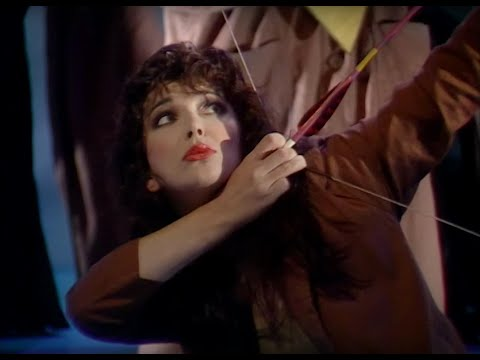

In [32]:
from IPython.display import YouTubeVideo
YouTubeVideo("-5Y52Gx2A4w")

In [ ]:
y = unisci(
    crea_suono("La#4", .4),
    np.zeros(4410),
    crea_suono("Sol4", .25),
    crea_suono("Do4", 1.25),
    
    crea_suono("La#4", .4),
    np.zeros(4410),
    crea_suono("Sol4", .25),
    crea_suono("Do4", 1.25),
    
    crea_suono("La#4", .4),
    np.zeros(4410),
    crea_suono("Sol4", .25),
    crea_suono("La#3", .5),
    crea_suono("Do4", .75),
    np.zeros(int(44100 * .25)),    
    crea_suono("La#3", .25),
    crea_suono("Do4", .25),
    crea_suono("Re#4", 1.25),
    np.zeros(int(44100 * .5)),
    crea_suono("La#4", .25),
    crea_suono("Do4", 1.25),
    np.zeros(int(44100 * .5)),
    crea_suono("La#4", .25),
    crea_suono("Do4", 1.25)
)
sound(y)